# Apply to ML model
#XGBOOST

### Jupyter notebook about oil stocks performance in Brazilian market!

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
ativos = ['PETR4','PRIO3', 'RRRP3', 'RECV3', 'ENAT3', 'BRKM5']
# new ativos

In [ ]:
ativos = [i + '.SA' for i in ativos]

In [ ]:
inicio = '2022-02-01'
#fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest = yesterday.strftime('%Y-%m-%d')
#yest.type()
yest

NameError: name 'datetime' is not defined

In [ ]:
df = yf.download(ativos, start = inicio, end = yest)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
df.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-08-22,22.639999,14.08,30.610001,45.099998,23.000000,31.770000
2023-08-23,22.879999,14.83,32.240002,45.849998,23.709999,31.610001
2023-08-24,22.650000,15.35,32.189999,46.060001,23.379999,31.469999
2023-08-25,22.129999,15.39,31.969999,46.389999,23.260000,31.680000
2023-08-28,22.590000,15.31,32.330002,46.689999,22.780001,31.320000


#### normalizando os ativos


In [ ]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

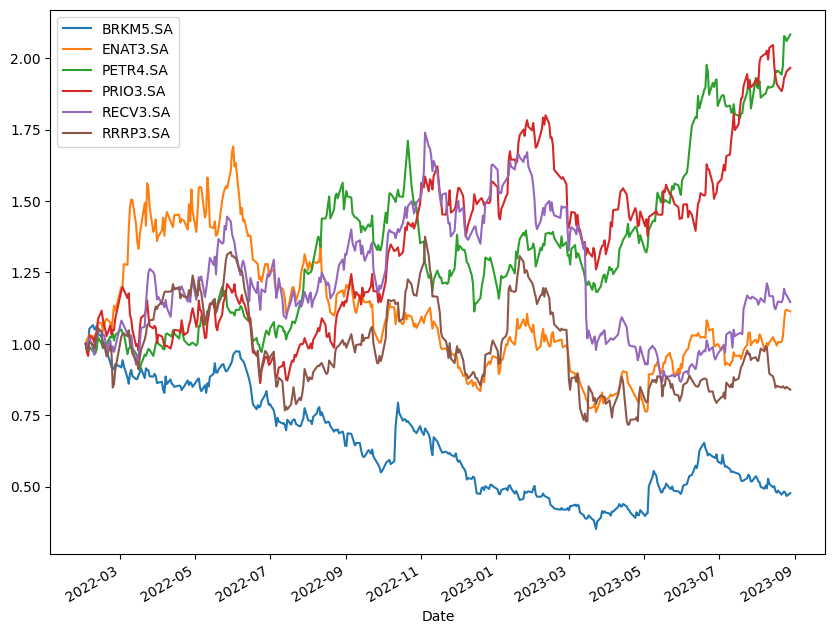

In [ ]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [ ]:
primeiro = df.iloc[0]

In [ ]:
primeiro

BRKM5.SA    47.347416
ENAT3.SA    13.744496
PETR4.SA    15.517876
PRIO3.SA    23.740000
RECV3.SA    19.869772
RRRP3.SA    37.299999
Name: 2022-02-01 00:00:00, dtype: float64

In [ ]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [ ]:
comprados = 10000/primeiro

In [ ]:
comprados

BRKM5.SA    211.204768
ENAT3.SA    727.563946
PETR4.SA    644.418103
PRIO3.SA    421.229996
RECV3.SA    503.277039
RRRP3.SA    268.096520
Name: 2022-02-01 00:00:00, dtype: float64

In [ ]:
## Número de papéis arredondados
round(comprados, 0)

BRKM5.SA    211.0
ENAT3.SA    728.0
PETR4.SA    644.0
PRIO3.SA    421.0
RECV3.SA    503.0
RRRP3.SA    268.0
Name: 2022-02-01 00:00:00, dtype: float64

In [ ]:
comprados = round(comprados, 0)

In [ ]:
comprados

BRKM5.SA    211.0
ENAT3.SA    728.0
PETR4.SA    644.0
PRIO3.SA    421.0
RECV3.SA    503.0
RRRP3.SA    268.0
Name: 2022-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [ ]:
PL = df*comprados
#PL=df*qntd

In [ ]:
PL.head()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2022-02-01,9990.304760,10005.993340,9993.511932,9994.539904,9994.495295,9996.399796
2022-02-02,9928.060146,10170.026199,9848.152905,9695.630289,10013.633333,9768.600204
2022-02-03,9994.195652,10202.832771,9711.878010,9573.539904,9783.984545,9782.000000
2022-02-04,10521.331837,10320.935875,9881.465282,10276.609936,10219.359573,10044.639877
2022-02-07,10643.876423,10275.006813,9736.105026,10175.570032,9827.044172,9983.000000


In [ ]:
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-08-22,4777.039871,10250.239944,19712.840393,18987.099358,11569.000000,8514.360123
2023-08-23,4827.679823,10796.239944,20762.561081,19302.849358,11926.129539,8471.480164
2023-08-24,4779.149920,11174.800278,20730.359116,19391.260578,11760.139578,8433.959816
2023-08-25,4669.429823,11203.920250,20588.679558,19530.189743,11699.780115,8490.240082
2023-08-28,4766.490032,11145.680305,20820.521179,19656.489422,11458.340345,8393.759918


In [ ]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [ ]:
#PL.head()
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,
2023-08-22,4777.039871,10250.239944,19712.840393,18987.099358,11569.000000,8514.360123,73810.579689
2023-08-23,4827.679823,10796.239944,20762.561081,19302.849358,11926.129539,8471.480164,76086.939909
2023-08-24,4779.149920,11174.800278,20730.359116,19391.260578,11760.139578,8433.959816,76269.669285
2023-08-25,4669.429823,11203.920250,20588.679558,19530.189743,11699.780115,8490.240082,76182.239571
2023-08-28,4766.490032,11145.680305,20820.521179,19656.489422,11458.340345,8393.759918,76241.281202


In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = yest)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,112143.0,113302.0,112135.0,113147.0,113147.0,11133300
2022-02-02,113228.0,113666.0,111645.0,112161.0,112161.0,11751200
2022-02-03,111897.0,112502.0,111225.0,111696.0,111696.0,11039700
2022-02-04,111696.0,112415.0,110321.0,112245.0,112245.0,0
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800


In [ ]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [ ]:
ibov = ibov[['Ibov']]

In [ ]:
ibov

,Ibov
Date,
2022-02-01,113147.0
2022-02-02,112161.0
2022-02-03,111696.0
2022-02-04,112245.0
2022-02-07,111996.0
...,...
2023-08-22,116156.0
2023-08-23,118135.0
2023-08-24,117026.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [ ]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2022-02-01,113147.0,9990.304760,10005.993340,9993.511932,9994.539904,9994.495295,9996.399796,59975.245026
2022-02-02,112161.0,9928.060146,10170.026199,9848.152905,9695.630289,10013.633333,9768.600204,59424.103077
2022-02-03,111696.0,9994.195652,10202.832771,9711.878010,9573.539904,9783.984545,9782.000000,59048.430882
2022-02-04,112245.0,10521.331837,10320.935875,9881.465282,10276.609936,10219.359573,10044.639877,61264.342381
2022-02-07,111996.0,10643.876423,10275.006813,9736.105026,10175.570032,9827.044172,9983.000000,60640.602467


<Axes: xlabel='Date'>

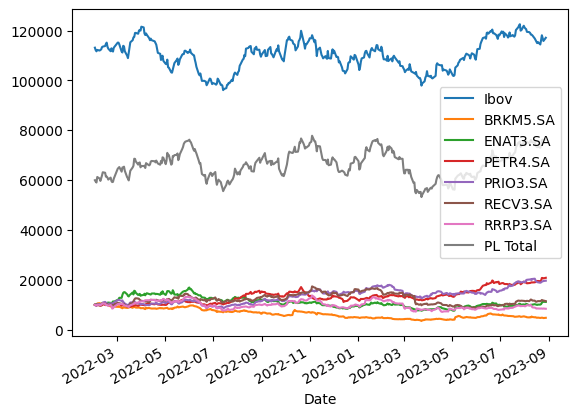

In [ ]:
novo_df.plot()

In [ ]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [ ]:
novo_normalizado

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2022-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-02-02,99.128567,99.376950,101.639346,98.545466,97.009271,100.191486,97.721184,99.081051
2022-02-03,98.717597,100.038947,101.967215,97.181832,95.787700,97.893733,97.855230,98.454672
2022-02-04,99.202807,105.315424,103.147539,98.878806,102.822241,102.249881,100.482575,102.149382
2022-02-07,98.982739,106.542059,102.688523,97.424260,101.811290,98.324567,99.865954,101.109387
...,...,...,...,...,...,...,...,...
2023-08-22,102.659372,47.816758,102.441003,197.256385,189.974722,115.753719,85.174266,123.068409
2023-08-23,104.408424,48.323649,107.897733,207.760407,193.133947,119.326981,84.745312,126.863908
2023-08-24,103.428284,47.837879,111.681069,207.438178,194.018542,117.666168,84.369973,127.168583


<Axes: xlabel='Date'>

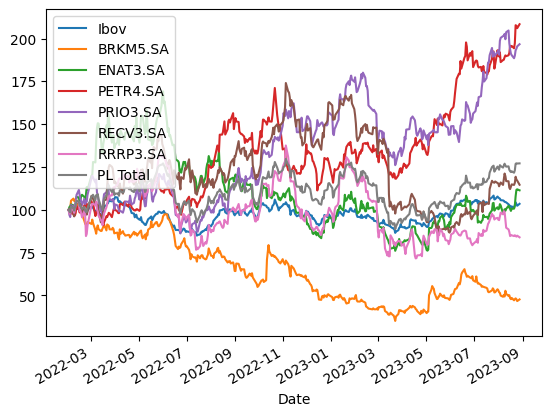

In [ ]:
novo_normalizado.plot()

<Axes: >

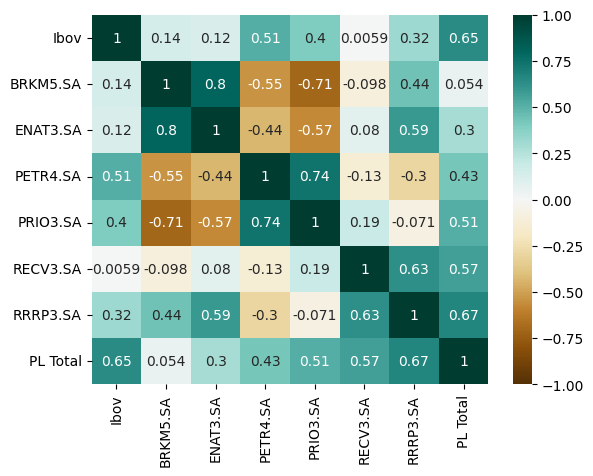

In [ ]:
sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

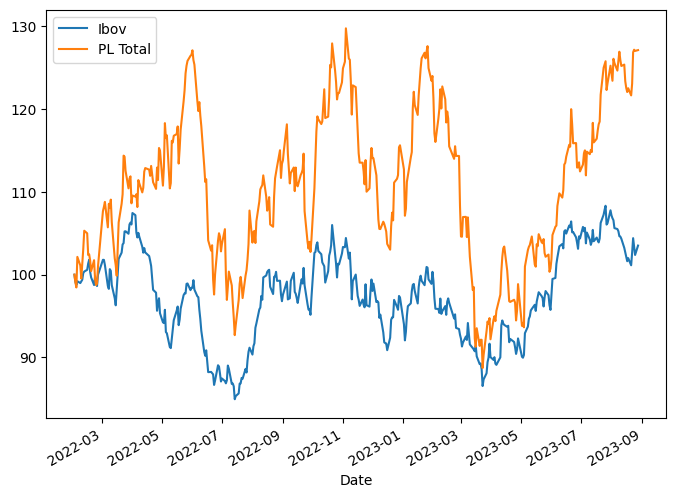

In [ ]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (8,6))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [ ]:
## oil stocks
ativos

['PETR4.SA', 'PRIO3.SA', 'RRRP3.SA', 'RECV3.SA', 'ENAT3.SA', 'BRKM5.SA']